Este ejemplo ilustra el uso de la librería Sickit-learn para regresión lineal, y algunas funciones útiles para hacer una inspección inicial del conjunto de datos a trabajar. El ejemplo se ha construido para el curso de inteligencia artíficial de la Universidad del Magdalena, a partir del ejemplo presentado en https://github.com/krishnaik06/Multiple-Linear-Regression.

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Leyendo el conjunto de datos de ejemplos

In [84]:
df = pd.read_csv('50_Startups.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [85]:
print(df.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


# Inspección y tratamiento inicial de los datos

Verificando que el conjunto de datos no tiene variables con valores faltantes o nulos

In [86]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Sacando aparte variables predictoras, y variable a predecir

In [87]:
X = df.iloc[:, :-1]
y = df.iloc[:, 4]

Observando la distribución de la variable a predecir

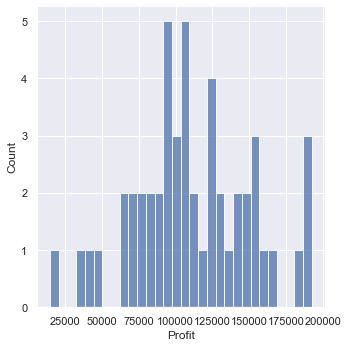

In [88]:
import seaborn as sns 

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(y, bins=30)
plt.show()

Inspeccionando la variable categórica States

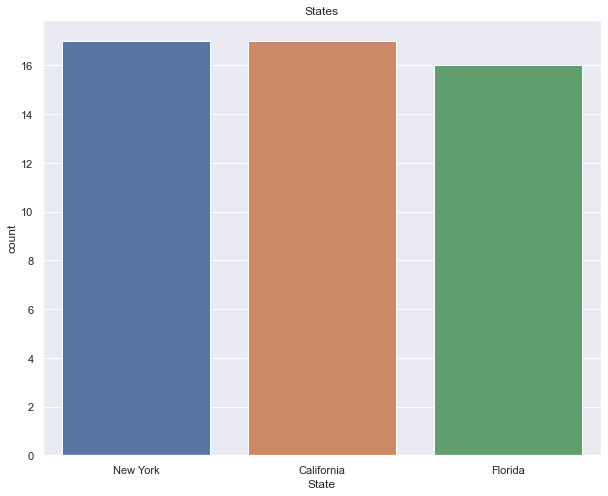

In [89]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='State',data=df)
plt.title("States")
plt.show()

Convirtiendo la variable State de categórica a numérica  

In [90]:
states=pd.get_dummies(X['State'])
X=X.drop('State',axis=1) #Elimina la variable State de X, y se queda con las nuevas variables creadas por cada categoría
X=pd.concat([X,states],axis=1)

print(X.head())

   R&D Spend  Administration  Marketing Spend  California  Florida  New York
0  165349.20       136897.80        471784.10           0        0         1
1  162597.70       151377.59        443898.53           1        0         0
2  153441.51       101145.55        407934.54           0        1         0
3  144372.41       118671.85        383199.62           0        0         1
4  142107.34        91391.77        366168.42           0        1         0


Inspeccionando por posible correlación entre las variables independientes

<AxesSubplot:>

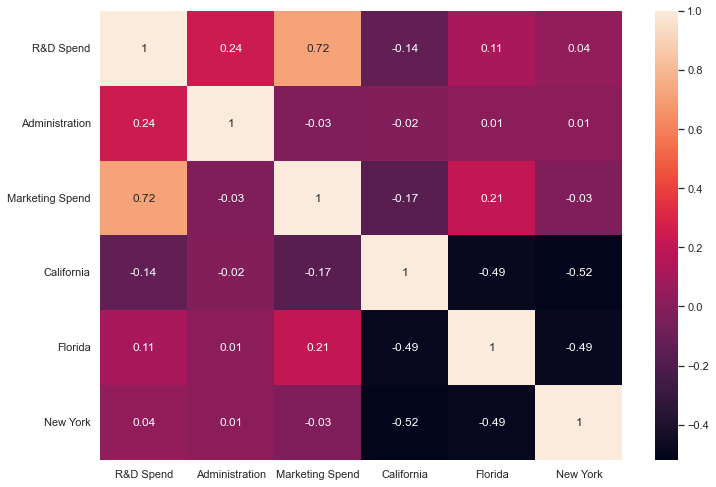

In [91]:
correlation_matrix = X.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Normalizando los datos

In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Implementación de un modelo de predicción con regresión lineal

División del conjunto de datos de ejemplos en un conjunto para entrenamiento, y otro para prueba

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [99]:
print("Cantidad de ejemplos para entrenamiento: ", len(X_train))
print("Cantidad de ejemplos para prueba: ", len(X_test))

Cantidad de ejemplos para entrenamiento:  40
Cantidad de ejemplos para prueba:  10


Uso de la clase LinearRegresssion

In [100]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Evaluación del modelo entrenado sobre el conjunto de datos de prueba

In [101]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_pred = regressor.predict(X_test)
score_r2 = r2_score(y_test,y_pred)
score_RMSE = mean_squared_error(y_test, y_pred, squared = False)
print(score_r2)
print(score_RMSE)


0.9347068473282425
9137.990152794944


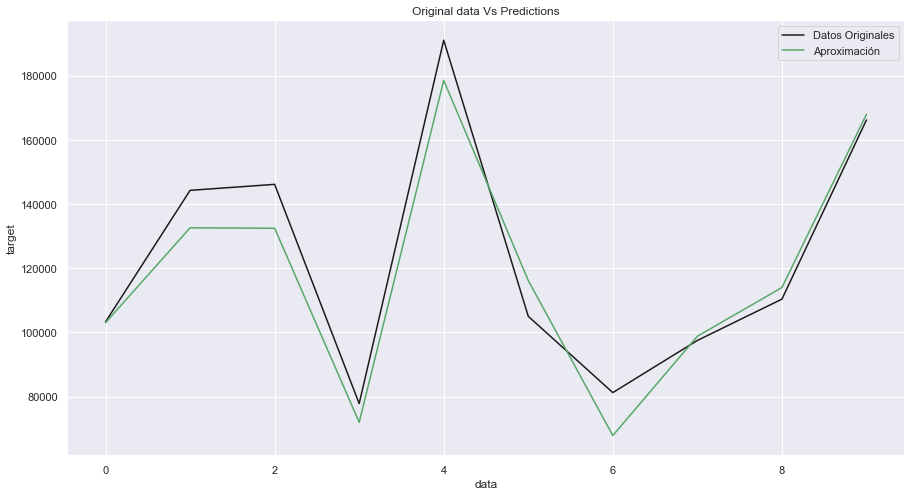

In [102]:
X = np.arange(0, len(y_test))
plt.figure(figsize=(15,8))
plt.plot(X, y_test, 'k', label='Datos Originales')
plt.plot(X, y_pred, 'g', label='Aproximación')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Original data Vs Predictions')
plt.legend()
plt.show()

# Implementando regresión Ridge

In [109]:
from sklearn.linear_model import Ridge

rd = Ridge(alpha = 10)
rd.fit(X_train, y_train)

predicted1 = rd.predict(X_test)

R2_1 = r2_score(y_test, predicted1)
print(R2_1)

mse_1 = mean_squared_error(y_test, predicted1, squared = False)  
print (mse_1)

0.3516141445759503
28796.097296750624


In [106]:
print(rd.n_features_in_)

6


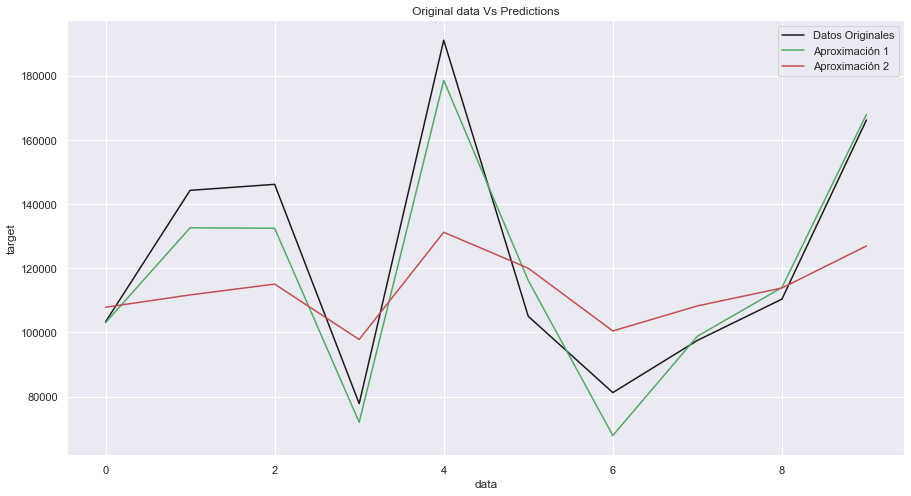

In [110]:
X = np.arange(0, len(y_test))
plt.figure(figsize=(15,8))
plt.plot(X, y_test, 'k', label='Datos Originales')
plt.plot(X, y_pred, 'g', label='Aproximación 1')
plt.plot(X, predicted1, 'r', label='Aproximación 2')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Original data Vs Predictions')
plt.legend()
plt.show()